# Polytech SI3 - Données numériques: classification de sons
Diane Lingrand
2022-2023


In [4]:
#chargement des librairies
import matplotlib.pyplot as plt
import numpy as np 
import librosa
import librosa.display
import IPython.display as ipd

In [5]:
import glob

In [6]:
basedir="/home/tsukoyachi/Documents/Ecole/SI3/ComputerScience/TD/S6/Données Numériques/TD4/"
# à adapter 
#attention, sous windows, il faut changer en "C:\\Users\\monNom\\monCoursPrefere\\"
classes = ["cat","dog","bird"] 
nbClasses = len(classes)

for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    print(cl,len(listSons))

cat 1733
dog 1746
bird 1731


## algorithme kNN

In [7]:
#knn algo
def voteKnn(xtrain, ytrain, nKnn, newData):
    
    classWhenAmbiguity = 2

    d = []
    for PX in xtrain:
        d.append(np.sqrt(np.power(PX[0] - newData[0], 2) + np.power(PX[1] - newData[1], 2) + np.power(PX[2] - newData[2], 2)))

    r = np.argsort(d)

    # nKNN smallest distances indices
    nei1 = r[0:nKnn]

    # nKNN closest data
    Xn1 = []
    yn1 = []
    for ji in nei1:
        Xn1.append(xtrain[ji])
        yn1.append(ytrain[ji])

    cl, co = np.unique(yn1, return_counts=True)
    nbOfMC = np.count_nonzero(co == np.max(co))  # Permet de récupérer le nombre de classe qui ont le nombre d'occurrence max du tableau
    if nbOfMC > 1:
        classe1 = classWhenAmbiguity
    else:
        maxOccIndex1 = np.argmax(co)  # renvoie l'indice de l'occurrence la plus élevée
        classe1 = cl[maxOccIndex1]  # on récupère la classe correspondant à cette occurrence la plus élevée, autrement dit on récupère la classe ayant le nombre d'occurrence le plus élevé, grâce à leur indice identique (dans les tableaux classes et counts, une classe à un indice précis va trouver son occurrence au même indice dans le tableau counts)
    return classe1


## Représentation des sons par 1 MFCC

In [8]:
# loading train dataset
nb=200 # for each class
i = 0
clNumber = 0
yTrain = []
Xtrain = np.empty(shape=(nb*nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    for s in listSons[:nb]:
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13, hop_length=len(sig)+1)
        Xtrain[i] = mfcc_feat.reshape(13)
        i += 1
    yTrain += [clNumber]*nb
    clNumber += 1

yTrain = np.array(yTrain)

In [9]:
## loading test dataset
i = 0
clNumber = 0
yTest = []
Xtest = np.empty(shape=(nb*nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    for s in listSons[-nb:]:
    #print("###",s,"###")
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13, hop_length=len(sig)+1)    
        Xtest[i] = mfcc_feat.reshape(13)
        i += 1
    yTest += [clNumber]*nb
    clNumber += 1

yTest = np.array(yTest)

## Représentation des sons par la moyenne des MFCCs (longueur standard)

In [10]:
# loading train dataset
nb=200 # for each class
i = 0
clNumber = 0
yTrain = []
Xtrain = np.empty(shape=(nb*nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    for s in listSons[:nb]:
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13)
        Xtrain[i] = np.mean(mfcc_feat, axis=1)
        i += 1
    yTrain += [clNumber]*nb
    clNumber += 1

yTrain = np.array(yTrain)

In [11]:
## loading test dataset
i = 0
clNumber = 0
yTest = []
Xtest = np.empty(shape=(nb*nbClasses, 13), dtype=float)
for cl in classes:
    listSons = glob.glob(basedir+cl+"/*.wav")
    for s in listSons[-nb:]:
    #print("###",s,"###")
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13)
        Xtest[i] = np.mean(mfcc_feat, axis=1)
        i += 1
    yTest += [clNumber]*nb
    clNumber += 1

yTest = np.array(yTest)

## Classification par kNN

**Question 1**: Pour chaque représentation des fichiers sons, calculez les prédictions d'une classification par kNN. Pour cela, il faudra tester plusieurs valeurs de k.

In [12]:
numberNN = 5

In [13]:
#predictions
predTrain = [voteKnn(Xtrain,yTrain,numberNN,i) for i in Xtrain]
predTest = [voteKnn(Xtest,yTest,numberNN,i) for i in Xtrain]

**Question 2**: Calculez les matrices de confusion, les métriques de précision 'accuracy' et de score F1 pour les données d'apprentissage et de test. Pour cela, écrire 3 fonctions: <ul> <li> une fonction qui affiche une matrice de confusion</li> <li>une fonction qui calcule la précision (accuracy)</li><li>une fonction qui calcule le score F1 d'une classe</li></ul>

In [25]:
def computeConfusionMatrix(predData,Ydata) :
    if len(Ydata) != len(predData): exit(1)
    classes = np.unique(Ydata)
    nb_classes = len(classes)
    matrix = [[0 for i2 in range(nb_classes)] for i3 in range(nb_classes)] # feat Nicolas Zanin
    for c in classes:
        for d, c2 in zip(Ydata, range(0, len(Ydata))):
            if d == c:
                matrix[c][predData[c2]] += 1
    return matrix

def printConfusionMatrix(matrixContent,Ytrain) :
    res = computeConfusionMatrix(matrixContent,Ytrain)
    print(res)


def accuracy(matrixContent,Ytrain) :
    matrix = computeConfusionMatrix(matrixContent,Ytrain)
    classesName = np.unique(matrixContent)
    nbClasse = len(classesName)
    fp = 0
    fn = 0
    vp = 0
    vn = 0
    for classe in range (0,nbClasse) :
        for x in range (0, nbClasse) :
            for y in range (0, nbClasse) :
                tmp = matrix[x][y]
                if(classe == x) :
                    if (x == y) :
                        vp += tmp
                    else :
                        fn += tmp
                else :
                    if(classe == y) :
                        fp += tmp
                    else :
                        vn += tmp
    return (vp+vn)/(fp+fn+vp+vn)

def f1(matrixContent, classe,Ytrain) :
    classesName = np.unique(matrixContent)
    nbClasse = len(classesName)
    if(classe >= nbClasse) :
        return 0
    matrix = computeConfusionMatrix(matrixContent,Ytrain)
    fp = 0
    fn = 0
    vp = 0
    vn = 0
    for x in range(0, nbClasse) :
        for y in range (0, nbClasse ) :
            tmp = matrix[x][y]
            if(classe == x) :
                if (x == y) :
                    vp += tmp
                else :
                    fn += tmp
            else :
                if(classe == y) :
                    fp += tmp
                else :
                    vn += tmp
    return (2*vp)/(2*vp + fp + fn)

**Question 3:** Affichez la courbe de la précision (accuracy) en fonction du k de kNN pour les données d'apprentissage et pour les données de test.

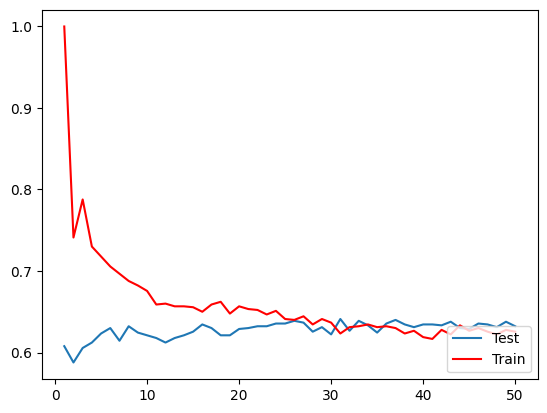

In [26]:
res = np.zeros(50)
train = np.zeros(50)
for y in range(1,51) :
    predTrain = [voteKnn(Xtrain,yTrain,y,i) for i in Xtrain]
    predTest = [voteKnn(Xtest,yTest,y,i) for i in Xtrain]
    res[y-1] = accuracy(predTest,yTest)
    train[y-1] = accuracy(predTrain,yTrain)
plt.plot(np.linspace(1,50,50),res)
plt.plot(np.linspace(1,50,50),train,color='red')
plt.legend(["Test","Train"], loc ="lower right")

**Question 4:** Parmi les 2 représentations proposées, laquelle vous parait la meilleure?

Réponse : Après plusieurs essais, la méthode de la moyenne me semble meilleur

# TP Standardisation

## Partie 1: standardisation

Comparez les métriques de classification par kNN soit avec les représentations par moyenne des MFCCs soit par ces représentations après standardisation.
Attention: pour la standardisation, les moyennes et écarts types doivent être calculés sur les données d'apprentissage (train). C'est la même standardisation qui doit être appliquée à toutes les données (train/valid/test).

## Partie 2: PCA

Implémenter l'algorithme de PCA en utilisant le guide dans les derniers slides du cours. Attention, la transformation s'apprend sur les données d'apprentissage (train) et s'applique ensuite sur toutes les données.

Utilisez la PCA pour visualiser les données en 2D.

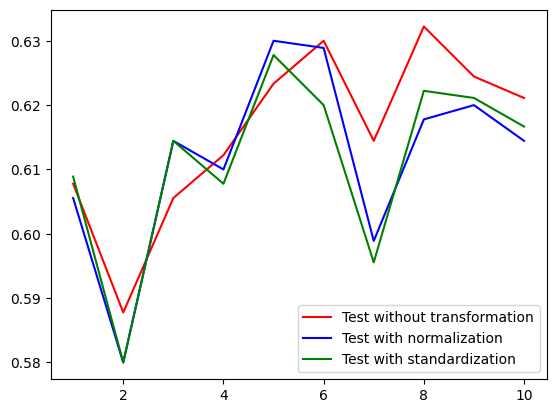

In [30]:
#Partie 1 : Comparaison des résultats précédents avec le résolutat après standardisation

abscisse = np.linspace(1,10,10)
res_without_transformation = np.zeros(10)
res_with_normalization = np.zeros(10)
res_with_standardization = np.zeros(10)

n = Xtrain.shape[0]
mu = np.mean(Xtrain,axis=0)
sigma = np.sqrt(np.sum((Xtrain-mu)*(Xtrain-mu),axis=0)/n)
mad = np.sum(np.abs(Xtrain - mu),axis=0)/n

Xtest_without_transformation = Xtest
Xtest_with_normalization = (Xtest - mu)/sigma
Xtest_with_standardization = (Xtest - mu)/mad

Xtrain_without_transformation = Xtrain
Xtrain_with_normalization = (Xtrain - mu)/sigma
Xtrain_without_standardization = (Xtrain - mu)/mad

for y in range(1,11) :
    predTest = [voteKnn(Xtest_without_transformation,yTest,y,i) for i in Xtrain_without_transformation]
    res_without_transformation[y-1] = accuracy(predTest,yTest)
    predTest = [voteKnn(Xtest_with_normalization,yTest,y,i) for i in Xtrain_with_normalization]
    res_with_normalization[y-1] = accuracy(predTest,yTest)
    predTest = [voteKnn(Xtest_with_standardization,yTest,y,i) for i in Xtrain_without_standardization]
    res_with_standardization[y-1] = accuracy(predTest,yTest)

plt.plot(abscisse,res_without_transformation,color='red')
plt.plot(abscisse,res_with_normalization,color='blue')
plt.plot(abscisse,res_with_standardization,color='green')
plt.legend(["Test without transformation","Test with normalization", "Test with standardization"], loc ="lower right")

In [ ]:
#Partie 2 : PCA